In [1]:
#import kagglehub
#path1 = kagglehub.dataset_download("mohaiminul101/wisconsin-diagnostic-breast-cancer-wdbc")
#print("Path to dataset files:", path1)
#path2 = kagglehub.dataset_download("tanshihjen/coimbra-breastcancer")
#print("Path to dataset files:", path2)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df1 = pd.read_csv('data_wisconsin.csv')

In [4]:
df1.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [6]:
df1.size

18777

In [7]:
df1.shape

(569, 33)

In [8]:
df1.duplicated().sum()

0

In [9]:
df1 = df1.iloc[:,1:-1]

In [10]:
diagnosis_counts = df1['diagnosis'].value_counts().reset_index()
diagnosis_counts.columns = ['Diagnosis', 'Count']

C:\Users\maina\AppData\Local\Temp\ipykernel_4384\1060472178.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Diagnosis', y='Count', data=diagnosis_counts, palette=['blue', 'orange'])


<Axes: xlabel='Diagnosis', ylabel='Count'>

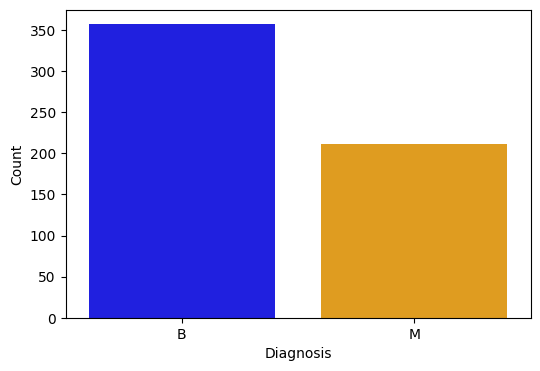

In [11]:
plt.figure(figsize=(6, 4))
sns.barplot(x='Diagnosis', y='Count', data=diagnosis_counts, palette=['blue', 'orange'])

In [12]:
def encode_diagnosis(type):
    return 1 if type == 'M' else 0

df1['diagnosis'] = df1['diagnosis'].apply(lambda x: encode_diagnosis(x))

In [13]:
df1.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [14]:
df1.corr()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


<Axes: >

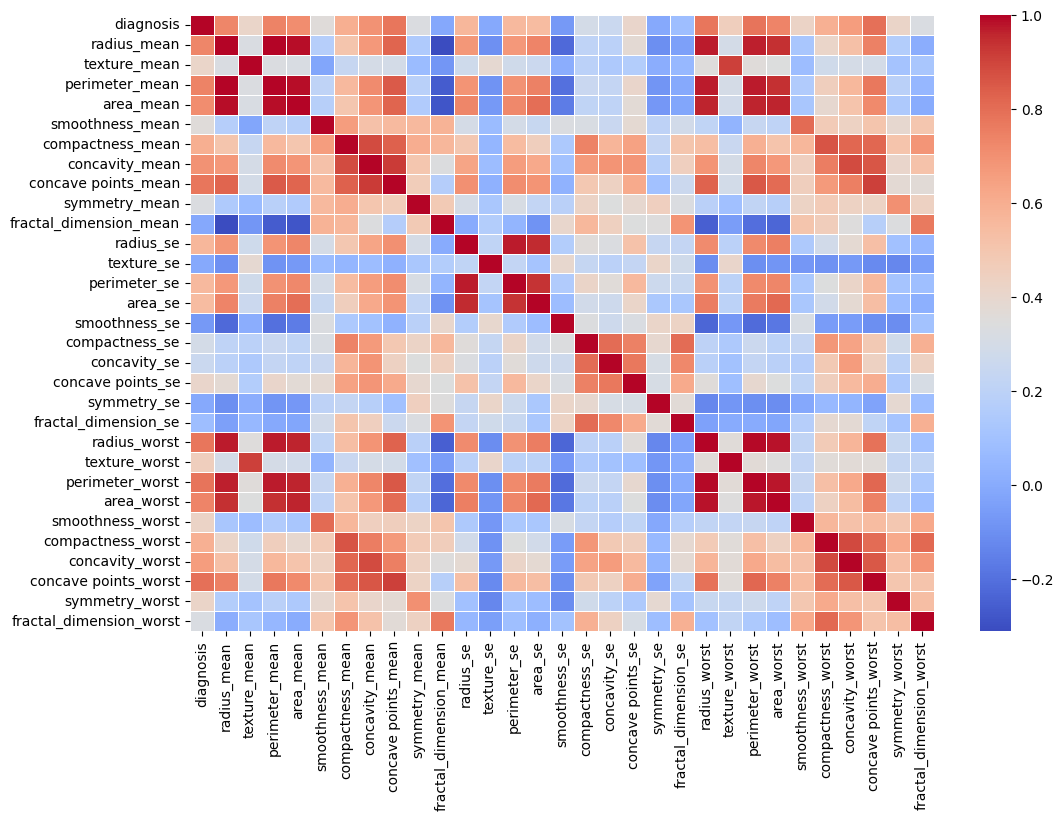

In [15]:
plt.figure(figsize=(12, 8))
sns.heatmap(df1.corr(), cmap="coolwarm", linewidths=0.5)

In [16]:
#good correlation -> radius_mean, perimeter_mean, area_mean, compactness_mean, cavity_mean, concave points_mean, radius_se, perimeter_se, area_se, radius_worst, perimeter_worst, area_worst, compactness_worst, concavity_worst, concave points_worst
df1_new = df1[['diagnosis', 'radius_mean', 'perimeter_mean', 'area_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'radius_se', 'perimeter_se', 'area_se', 'radius_worst', 'perimeter_worst', 'area_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst']]

In [17]:
df1_new.head()

,diagnosis,radius_mean,perimeter_mean,area_mean,compactness_mean,concavity_mean,concave points_mean,radius_se,perimeter_se,area_se,radius_worst,perimeter_worst,area_worst,compactness_worst,concavity_worst,concave points_worst
0,1,17.99,122.80,1001.0,0.27760,0.3001,0.14710,1.0950,8.589,153.40,25.38,184.60,2019.0,0.6656,0.7119,0.2654
1,1,20.57,132.90,1326.0,0.07864,0.0869,0.07017,0.5435,3.398,74.08,24.99,158.80,1956.0,0.1866,0.2416,0.1860
2,1,19.69,130.00,1203.0,0.15990,0.1974,0.12790,0.7456,4.585,94.03,23.57,152.50,1709.0,0.4245,0.4504,0.2430
3,1,11.42,77.58,386.1,0.28390,0.2414,0.10520,0.4956,3.445,27.23,14.91,98.87,567.7,0.8663,0.6869,0.2575
4,1,20.29,135.10,1297.0,0.13280,0.1980,0.10430,0.7572,5.438,94.44,22.54,152.20,1575.0,0.2050,0.4000,0.1625


In [18]:
df1_new.shape

(569, 16)

In [19]:
X = df1_new.drop(columns='diagnosis')
y = df1_new['diagnosis']

In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [22]:
X_scaled[0]

array([1.09706398, 1.26993369, 0.9843749 , 3.28351467, 2.65287398,
       2.53247522, 2.48973393, 2.83303087, 2.48757756, 1.88668963,
       2.30360062, 2.00123749, 2.61666502, 2.10952635, 2.29607613])

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=42)

In [24]:
from sklearn.linear_model import LogisticRegression
lor = LogisticRegression(multi_class='multinomial')

In [25]:
lor.fit(X_train, y_train)

LogisticRegression(multi_class='multinomial')

In [26]:
lor.predict(X_test)

array([0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0], dtype=int64)

In [27]:
y_test.values

array([0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0], dtype=int64)

In [28]:
from sklearn.metrics import classification_report
y_pred = lor.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97        89
           1       0.93      0.96      0.95        54

    accuracy                           0.96       143
   macro avg       0.95      0.96      0.96       143
weighted avg       0.96      0.96      0.96       143



In [29]:
lor2 = LogisticRegression(multi_class='multinomial')

In [30]:
lor2.fit(X_train, y_train)

LogisticRegression(multi_class='multinomial')

In [31]:
lor2.predict(X_test)

array([0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0], dtype=int64)

In [32]:
y_test.values

array([0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0], dtype=int64)

In [33]:
y_pred_softmax = lor2.predict(X_test)
print(classification_report(y_test, y_pred_softmax))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97        89
           1       0.93      0.96      0.95        54

    accuracy                           0.96       143
   macro avg       0.95      0.96      0.96       143
weighted avg       0.96      0.96      0.96       143



In [34]:
from sklearn.tree import DecisionTreeClassifier
dtclf = DecisionTreeClassifier(random_state=42)

In [35]:
dtclf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [36]:
dtclf.predict(X_test)

array([0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0], dtype=int64)

In [37]:
y_pred_dt = dtclf.predict(X_test)
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94        89
           1       0.89      0.93      0.91        54

    accuracy                           0.93       143
   macro avg       0.92      0.93      0.93       143
weighted avg       0.93      0.93      0.93       143



[Text(0.5183823529411765, 0.9444444444444444, 'X[5] <= 0.061\ngini = 0.467\nsamples = 426\nvalue = [268, 158]'),
 Text(0.3161764705882353, 0.8333333333333334, 'X[9] <= 0.116\ngini = 0.113\nsamples = 267\nvalue = [251, 16]'),
 Text(0.19117647058823528, 0.7222222222222222, 'X[8] <= 0.184\ngini = 0.039\nsamples = 249\nvalue = [244, 5]'),
 Text(0.11764705882352941, 0.6111111111111112, 'X[12] <= 1.25\ngini = 0.024\nsamples = 246\nvalue = [243, 3]'),
 Text(0.058823529411764705, 0.5, 'X[14] <= -0.326\ngini = 0.016\nsamples = 242\nvalue = [240, 2]'),
 Text(0.029411764705882353, 0.3888888888888889, 'gini = 0.0\nsamples = 190\nvalue = [190, 0]'),
 Text(0.08823529411764706, 0.3888888888888889, 'X[14] <= -0.32\ngini = 0.074\nsamples = 52\nvalue = [50, 2]'),
 Text(0.058823529411764705, 0.2777777777777778, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.11764705882352941, 0.2777777777777778, 'X[4] <= -0.718\ngini = 0.038\nsamples = 51\nvalue = [50, 1]'),
 Text(0.08823529411764706, 0.166666666666

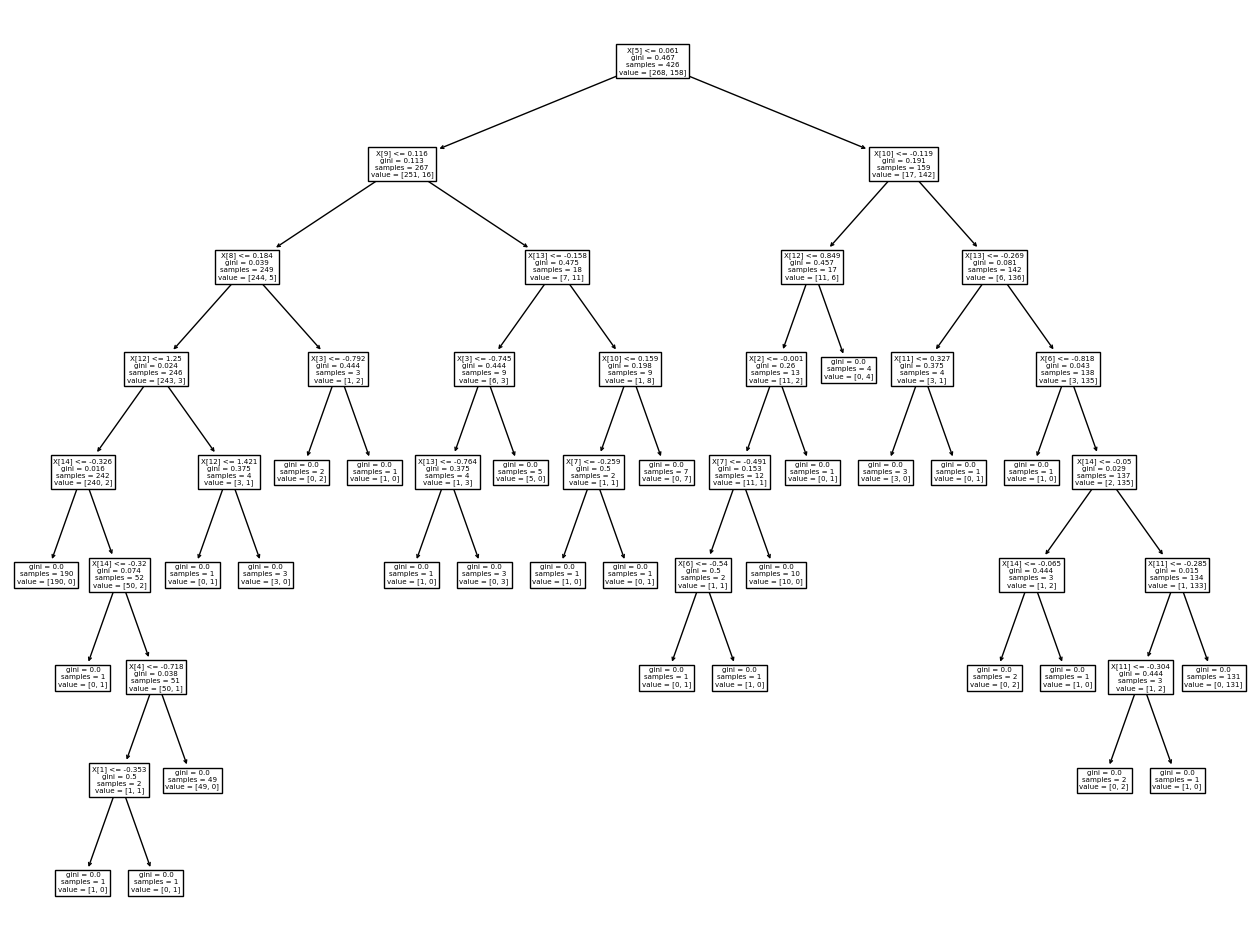

In [38]:
from sklearn.tree import plot_tree
plt.figure(figsize=(16, 12))
plot_tree(dtclf)

In [39]:
dtclf2 = DecisionTreeClassifier(max_depth=4, random_state=42)
dtclf2.fit(X_train, y_train)
y_pred_dt2 = dtclf2.predict(X_test)
print(classification_report(y_test, y_pred_dt2))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        89
           1       0.93      0.93      0.93        54

    accuracy                           0.94       143
   macro avg       0.94      0.94      0.94       143
weighted avg       0.94      0.94      0.94       143



In [40]:
from sklearn.ensemble import RandomForestClassifier
rfclf = RandomForestClassifier(n_estimators=200, random_state=42)

In [41]:
rfclf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=42)

In [42]:
y_pred_rf = rfclf.predict(X_test)
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        89
           1       0.96      0.96      0.96        54

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143



In [43]:
from sklearn.svm import SVC

In [44]:
svc = SVC(kernel='linear', random_state=42)

In [45]:
svc.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [46]:
y_pred_svc = svc.predict(X_test)
print(classification_report(y_test, y_pred_svc))

              precision    recall  f1-score   support

           0       0.98      0.94      0.96        89
           1       0.91      0.96      0.94        54

    accuracy                           0.95       143
   macro avg       0.94      0.95      0.95       143
weighted avg       0.95      0.95      0.95       143



In [47]:
from sklearn.ensemble import VotingClassifier
vclf = VotingClassifier(estimators=[
    ('svc', svc),
    ('rf', rfclf),
    ('lor_softmax', lor2),
], voting='hard')
vclf.fit(X_train, y_train)
y_pred_vclf = vclf.predict(X_test)
print(classification_report(y_test, y_pred_vclf))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97        89
           1       0.93      0.96      0.95        54

    accuracy                           0.96       143
   macro avg       0.95      0.96      0.96       143
weighted avg       0.96      0.96      0.96       143



In [48]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                         n_estimators=500, learning_rate=0.1)
ada.fit(X_train, y_train)
y_pred_adb = ada.predict(X_test)
print(classification_report(y_test, y_pred_adb))

              precision    recall  f1-score   support

           0       0.97      0.94      0.95        89
           1       0.91      0.94      0.93        54

    accuracy                           0.94       143
   macro avg       0.94      0.94      0.94       143
weighted avg       0.94      0.94      0.94       143



In [49]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)
print(classification_report(y_test, y_pred_gb))

              precision    recall  f1-score   support

           0       0.97      0.94      0.95        89
           1       0.91      0.94      0.93        54

    accuracy                           0.94       143
   macro avg       0.94      0.94      0.94       143
weighted avg       0.94      0.94      0.94       143



In [50]:
from sklearn.ensemble import StackingClassifier
stclf = StackingClassifier(estimators=[('rfclf', rfclf), ('gb', gb)],
                          final_estimator=lor2)
stclf.fit(X_train, y_train)
y_pred_st = stclf.predict(X_test)
print(classification_report(y_test, y_pred_st))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97        89
           1       0.93      0.96      0.95        54

    accuracy                           0.96       143
   macro avg       0.95      0.96      0.96       143
weighted avg       0.96      0.96      0.96       143



In [51]:
from xgboost import XGBClassifier
xgb = XGBClassifier()

In [52]:
from sklearn.model_selection import GridSearchCV

In [53]:
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.3],
    'max_depth': [3, 6, 9],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0, 0.1, 0.2]
}

grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train, y_train)
grid_search.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.1, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [54]:
grid_search.best_params_

{'colsample_bytree': 0.8,
 'gamma': 0.1,
 'learning_rate': 0.1,
 'max_depth': 6,
 'n_estimators': 100,
 'subsample': 0.8}

In [55]:
xg = XGBClassifier(
    colsample_bytree=0.8,
    gamma=0.1,
    learning_rate=0.1,
    max_depth=6,
    n_estimators=100,
    subsample=0.8,
    eval_metric='logloss'
)
xg.fit(X_train, y_train)
y_pred_xg = xg.predict(X_test)
print(classification_report(y_test, y_pred_xg))

              precision    recall  f1-score   support

           0       0.97      0.96      0.96        89
           1       0.93      0.94      0.94        54

    accuracy                           0.95       143
   macro avg       0.95      0.95      0.95       143
weighted avg       0.95      0.95      0.95       143



In [56]:
df1_new.head()

,diagnosis,radius_mean,perimeter_mean,area_mean,compactness_mean,concavity_mean,concave points_mean,radius_se,perimeter_se,area_se,radius_worst,perimeter_worst,area_worst,compactness_worst,concavity_worst,concave points_worst
0,1,17.99,122.80,1001.0,0.27760,0.3001,0.14710,1.0950,8.589,153.40,25.38,184.60,2019.0,0.6656,0.7119,0.2654
1,1,20.57,132.90,1326.0,0.07864,0.0869,0.07017,0.5435,3.398,74.08,24.99,158.80,1956.0,0.1866,0.2416,0.1860
2,1,19.69,130.00,1203.0,0.15990,0.1974,0.12790,0.7456,4.585,94.03,23.57,152.50,1709.0,0.4245,0.4504,0.2430
3,1,11.42,77.58,386.1,0.28390,0.2414,0.10520,0.4956,3.445,27.23,14.91,98.87,567.7,0.8663,0.6869,0.2575
4,1,20.29,135.10,1297.0,0.13280,0.1980,0.10430,0.7572,5.438,94.44,22.54,152.20,1575.0,0.2050,0.4000,0.1625


In [57]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2

In [58]:
ann = Sequential([
    Dense(128, activation='relu', kernel_regularizer=l2(0.01), input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

optimizer = tf.keras.optimizers.Adam(learning_rate=0.005) 
ann.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

ann.summary()

C:\Users\maina\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │           2,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,185 (51.50 KB)

 Trainable params: 12,801 (50.00 KB)

 Non-trainable params: 384 (1.50 KB)

In [59]:
history = ann.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)

Epoch 1/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.8304 - loss: 0.6512 - val_accuracy: 0.9510 - val_loss: 0.4239
Epoch 2/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9231 - loss: 0.4018 - val_accuracy: 0.9510 - val_loss: 0.3605
Epoch 3/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9323 - loss: 0.3383 - val_accuracy: 0.9580 - val_loss: 0.3559
Epoch 4/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9472 - loss: 0.2731 - val_accuracy: 0.9580 - val_loss: 0.3710
Epoch 5/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9488 - loss: 0.2560 - val_accuracy: 0.9650 - val_loss: 0.3377
Epoch 6/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9359 - loss: 0.2444 - val_accuracy: 0.9580 - val_loss: 0.3315
Epoch 7/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9556 - loss: 0.2188 - val_accuracy: 0.9510 - val_loss: 0.2745
Epoch 8/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9504 - loss: 0.2092 - val_accuracy: 0.9510 - val_loss

In [60]:
test_loss, test_acc = ann.evaluate(X_test, y_test)
print(f"\nTest Accuracy: {test_acc:.4f}")
y_pred_probs = ann.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype(int)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9574 - loss: 0.1603 

Test Accuracy: 0.9580
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


In [61]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_pred):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred):.4f}")

Accuracy: 0.9580
Precision: 0.9286
Recall: 0.9630
F1 Score: 0.9455


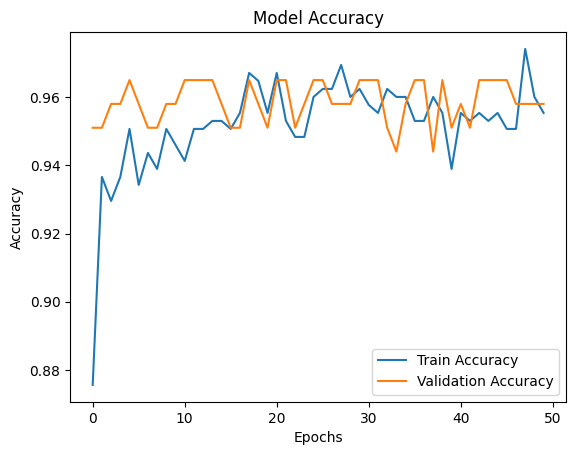

In [62]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')
plt.show()

In [63]:
malignant_sample = np.array([
    17.99, 122.8, 1001.0, 0.2776, 0.3001, 0.1471, 
    1.095, 8.589, 153.4, 25.38, 184.6, 2019.0, 
    0.6656, 0.7119, 0.2654
]).reshape(1, -1)

benign_sample = np.array([
    13.08, 82.96, 520.0, 0.1349, 0.1005, 0.0498, 
    0.873, 5.395, 47.16, 14.45, 94.29, 644.8, 
    0.1783, 0.1442, 0.07734
]).reshape(1, -1)

malignant_scaled = scaler.transform(malignant_sample)
benign_scaled = scaler.transform(benign_sample)

malignant_prediction = ann.predict(malignant_scaled)
benign_prediction = ann.predict(benign_scaled)

malignant_result = (malignant_prediction > 0.5).astype(int)
benign_result = (benign_prediction > 0.5).astype(int)

print(f"Malignant Sample Prediction: {'Malignant' if malignant_result[0][0] == 1 else 'Benign'}")
print(f"Benign Sample Prediction: {'Malignant' if benign_result[0][0] == 1 else 'Benign'}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Malignant Sample Prediction: Malignant
Benign Sample Prediction: Benign


C:\Users\maina\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\maina\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [64]:
models = {
    "Logistic Regression": lor,
    "Softmax Regression": lor2,
    "Decision Tree (full grown)": dtclf,
    "Decision Tree (max_depth=4)": dtclf2,
    "Random Forest": rfclf,
    "SVM": svc,
    "Voting Classifier (Support Vector Classifier, Random Forest, Softmax Regression)": vclf,
    "AdaBoost Classifier (500 estimators)": ada,
    "Gradient Boosting Classifier (100 estimators)": gb,
    "Stacking Classifier (Random Forest, Gradient Boosting Classifier, Softmax Regression as Final estimator)": stclf,
    "XGBoost": xg,
    "ANN": ann
}

metrics_data = []

for name, model in models.items():
    y_pred = model.predict(X_test)

    if y_pred.ndim > 1 and y_pred.shape[1] > 1:
        y_pred = np.argmax(y_pred, axis=1)
    elif y_pred.ndim > 1:
        y_pred = (y_pred > 0.5).astype(int)

    metrics_data.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, average="weighted"),
        "Recall": recall_score(y_test, y_pred, average="weighted"),
        "F1 Score": f1_score(y_test, y_pred, average="weighted")
    })

metrics_df = pd.DataFrame(metrics_data)
metrics_df

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.958042,0.958719,0.958042,0.958185
1,Softmax Regression,0.958042,0.958719,0.958042,0.958185
2,Decision Tree (full grown),0.930070,0.930925,0.930070,0.930308
3,Decision Tree (max_depth=4),0.944056,0.944056,0.944056,0.944056
4,Random Forest,0.972028,0.972028,0.972028,0.972028
5,SVM,0.951049,0.952401,0.951049,0.951291
6,"Voting Classifier (Support Vector Classifier, ...",0.958042,0.958719,0.958042,0.958185
7,AdaBoost Classifier (500 estimators),0.944056,0.944822,0.944056,0.944247
8,Gradient Boosting Classifier (100 estimators),0.944056,0.944822,0.944056,0.944247
9,"Stacking Classifier (Random Forest, Gradient B...",0.958042,0.958719,0.958042,0.958185


In [65]:
for name, model in models.items():
    malignant_prediction = model.predict(malignant_sample if name == "Gaussian Naive Bayes" else malignant_scaled)
    benign_prediction = model.predict(benign_sample if name == "Gaussian Naive Bayes" else benign_scaled)

    if isinstance(malignant_prediction, (np.ndarray, list)):
        if malignant_prediction.ndim > 1 and malignant_prediction.shape[1] > 1:  
            malignant_label = np.argmax(malignant_prediction, axis=1)[0]
            benign_label = np.argmax(benign_prediction, axis=1)[0]
        else:
            malignant_label = int(malignant_prediction[0] > 0.5) if malignant_prediction.ndim == 1 else int(malignant_prediction[0][0] > 0.5)
            benign_label = int(benign_prediction[0] > 0.5) if benign_prediction.ndim == 1 else int(benign_prediction[0][0] > 0.5)
    else:
        malignant_label = int(malignant_prediction > 0.5)
        benign_label = int(benign_prediction > 0.5)

    print(f"Model: {name}")
    print(f"Malignant Sample Prediction: {'Malignant' if malignant_label == 1 else 'Benign'}")
    print(f"Benign Sample Prediction: {'Malignant' if benign_label == 1 else 'Benign'}\n")

Model: Logistic Regression
Malignant Sample Prediction: Malignant
Benign Sample Prediction: Benign

Model: Softmax Regression
Malignant Sample Prediction: Malignant
Benign Sample Prediction: Benign

Model: Decision Tree (full grown)
Malignant Sample Prediction: Malignant
Benign Sample Prediction: Benign

Model: Decision Tree (max_depth=4)
Malignant Sample Prediction: Malignant
Benign Sample Prediction: Benign

Model: Random Forest
Malignant Sample Prediction: Malignant
Benign Sample Prediction: Benign

Model: SVM
Malignant Sample Prediction: Malignant
Benign Sample Prediction: Benign

Model: Voting Classifier (Support Vector Classifier, Random Forest, Softmax Regression)
Malignant Sample Prediction: Malignant
Benign Sample Prediction: Benign

Model: AdaBoost Classifier (500 estimators)
Malignant Sample Prediction: Malignant
Benign Sample Prediction: Benign

Model: Gradient Boosting Classifier (100 estimators)
Malignant Sample Prediction: Malignant
Benign Sample Prediction: Benign

Mode